<a href="https://colab.research.google.com/github/Raghvender1205/Mini-Project/blob/main/Minor_Project_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Image Classification Minor Project

In this using different algorithms image classification on different kinds of data is done.

Many Steps are involved.
- Data Input
- Data Preprocessing
- Data split
- Pipeline
- Model Creation
- Training
- Prediction
- Classification Report and Metrics


Link to the all the datasets used here is below this hyperlink.

[Google Drive](https://drive.google.com/drive/folders/19WtdlvNPKVNE3mQGbjyIAisvtCUQLrIl?usp=sharing)

## 1. Image Classification using SVM
Supported Vector Machine is imported from <code>sklearn</code> using 
```python
from sklearn.svm import SVC
```

In this image classification, we are using digits dataset from <code>sklearn</code>. It is imported by:
```python 
from sklearn.datasets import load_digits()
```

In [2]:
# Import Libraries
import numpy as np
import pandas as pd
from subprocess import check_output
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score, classification_report 
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Load Dataset
data = load_digits()
print('Digits datasets keys \n{}'.format(data.keys()))

Digits datasets keys 
dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])


In [4]:
print('Dataset target name: \n{}'.format(data.target_names))
print('Shape of images', data.images.shape)
print('Shape of dataset: {} \nand target: {}'.format(data.data.shape, data.target.shape))

Dataset target name: 
[0 1 2 3 4 5 6 7 8 9]
Shape of images (1797, 8, 8)
Shape of dataset: (1797, 64) 
and target: (1797,)


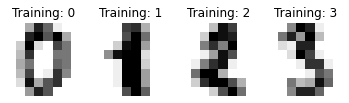

In [5]:
# Plot and visualize data
for i in range(0, 4):
    plt.subplot(2, 4, i + 1)
    plt.axis('off')
    imside = int(np.sqrt(data.data[i].shape[0]))
    im1 = np.reshape(data.data[i], (imside, imside))
    plt.imshow(im1, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: {}'.format(data.target[i]))
plt.show()

In [6]:
# Flatten images
n_samples = len(data.images)
data_images = data.images.reshape((n_samples, -1))

In [7]:
# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_images, data.target)

print('Training data and target sizes: \n{}, {}'.format(X_train.shape,y_train.shape))
print('Test data and target sizes: \n{}, {}'.format(X_test.shape,y_test.shape))

Training data and target sizes: 
(1347, 64), (1347,)
Test data and target sizes: 
(450, 64), (450,)


In [8]:
# SVM Classifier
svm_clf = SVC(gamma=0.001)

svm_clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [9]:
# Predict
y_pred = svm_clf.predict(X_test)

In [11]:
from sklearn.metrics import confusion_matrix
# Classification Report
print("Classification report for classifier %s:\n%s\n"
      % (svm_clf, classification_report(y_test, y_pred)))

print()
print('Confusion Matrix: \n%s' % confusion_matrix(y_test, y_pred))

Classification report for classifier SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        46
           1       0.98      1.00      0.99        53
           2       1.00      1.00      1.00        39
           3       1.00      0.96      0.98        51
           4       0.98      1.00      0.99        42
           5       0.96      1.00      0.98        45
           6       1.00      1.00      1.00        50
           7       1.00      0.98      0.99        46
           8       0.92      0.97      0.95        36
           9       0.97      0.93      0.95        42

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted a

## 2. Image Classification using Naive Bayes
Naive Bayes algorithm Classifier is imported from <code>sklearn</code> by:
```python
from sklearn.naive_bayes import GaussianNB
```

In this wine dataset from </code>sklearn</code> is being used by importing:
```python
from sklearn.datasets import load_wine
```

In [12]:
# Import some Libraries
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_wine

In [13]:
# Data
wine = load_wine()

print('Features: ', wine.feature_names)
print('\n')
print('Labels: ', wine.target_names)

Features:  ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


Labels:  ['class_0' 'class_1' 'class_2']


In [14]:
print(wine.data.shape)

(178, 13)


In [15]:
# First 5 records
print(wine.data)

[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]


In [16]:
# Target Values
print(wine.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [17]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3, random_state=109) # 70% Train, 30% test

In [18]:
# Naive Bayes Classifier
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)

# Predict
y_pred = nb_clf.predict(X_test)

In [20]:
# Model Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9074074074074074


In [24]:
# Classification report 
print(classification_report(y_test, y_pred))
print('\n')

# Confusion Matrix
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93        21
           1       0.94      0.79      0.86        19
           2       0.88      1.00      0.93        14

    accuracy                           0.91        54
   macro avg       0.91      0.91      0.91        54
weighted avg       0.91      0.91      0.91        54



Confusion Matrix:  [[20  1  0]
 [ 2 15  2]
 [ 0  0 14]]


## 3. Image Classification using Logistic Regression
<code>Logistic Regression</code> is imported from <code>sklearn</code> with <code>GridSearchCV</code> like this:
```python
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
```

The data is taken from Kaggle's messy and clean room classification.

Link:- https://www.kaggle.com/cdawn1/messy-vs-clean-room

The downloaded dataset is in the link with other datasets being used.

In [26]:
# Install opencv-python
import cv2
from random import shuffle
from tqdm import tqdm
from PIL import Image
import os

# LR
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [28]:
print(os.listdir('/content/drive/MyDrive/SmartKnower/Minor Project/images'))

['test', 'train', 'val']


In [29]:
# some vars..
train_messy = '/content/drive/MyDrive/SmartKnower/Minor Project/images/train/messy'
train_clean = '/content/drive/MyDrive/SmartKnower/Minor Project/images/train/clean'
test_messy = '/content/drive/MyDrive/SmartKnower/Minor Project/images/val/messy'
test_clean = '/content/drive/MyDrive/SmartKnower/Minor Project/images/val/clean'

img_size = 128

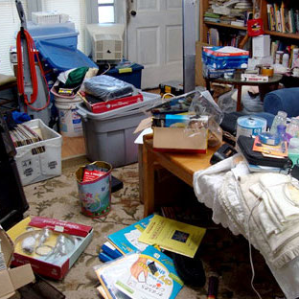

In [30]:
# Messy Room Example
Image.open('/content/drive/MyDrive/SmartKnower/Minor Project/images/train/messy/0.png')

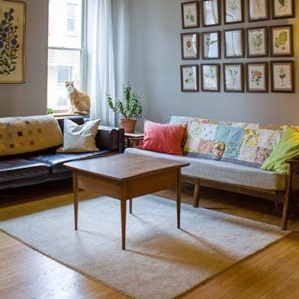

In [32]:
# Clean Room Example
Image.open('/content/drive/MyDrive/SmartKnower/Minor Project/images/train/clean/0.png')

100%|██████████| 96/96 [00:37<00:00,  2.54it/s]


Text(0.5, 1.0, 'Messy and Clean Rooms in GrayScale')

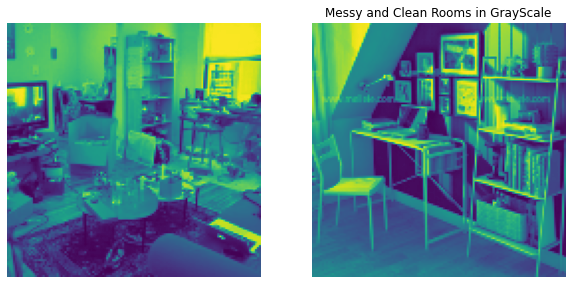

In [33]:
# Resize and preprocess Data input pipeline
for image in tqdm(os.listdir(train_messy)):
    path = os.path.join(train_messy, image)
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (img_size, img_size)).flatten()
    np_img = np.asarray(img)

for image2 in tqdm(os.listdir(train_clean)):
    path = os.path.join(train_clean, image2)
    img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    img2 = cv2.resize(img2, (img_size, img_size)).flatten()
    np_img2 = np.asarray(img2)

    
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(np_img.reshape(img_size, img_size))
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(np_img2.reshape(img_size, img_size))
plt.axis('off')
plt.title("Messy and Clean Rooms in GrayScale")

In [34]:
# Train data Function
def train_data():
    train_data_messy = [] 
    train_data_clean=[]
    for image1 in tqdm(os.listdir(train_messy)): 
        path = os.path.join(train_messy, image)
        img1 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img1 = cv2.resize(img1, (img_size, img_size))
        train_data_messy.append(img1) 
    
    for image2 in tqdm(os.listdir(train_clean)): 
        path = os.path.join(train_clean, image)
        img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img2 = cv2.resize(img2, (img_size, img_size))
        train_data_clean.append(img2) 
    
    train_data= np.concatenate((np.asarray(train_data_messy), np.asarray(train_data_clean)), axis=0)
    return train_data 

In [35]:
def test_data():
    test_data_messy = [] 
    test_data_clean=[]
    for image1 in tqdm(os.listdir(test_messy)): 
        path = os.path.join(test_messy, image1)
        img1 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img1 = cv2.resize(img1, (img_size, img_size))
        test_data_messy.append(img1) 
        
    for image2 in tqdm(os.listdir(test_clean)): 
        path = os.path.join(test_clean, image2)
        img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img2 = cv2.resize(img2, (img_size, img_size))
        test_data_clean.append(img2) 
    
    test_data= np.concatenate((np.asarray(test_data_messy), np.asarray(test_data_clean)), axis=0) 
    return test_data 

In [36]:
train_data = train_data()
test_data = test_data()

100%|██████████| 10/10 [00:03<00:00,  2.89it/s]


In [37]:
X_data = np.concatenate((train_data, test_data), axis=0)
X_data = (X_data - np.min(X_data)) / (np.max(X_data) - np.min(X_data))

In [38]:
z1 = np.zeros(96)
o1 = np.ones(96)
Y_train = np.concatenate((o1, z1), axis=0)
z = np.zeros(10)
o = np.ones(10)
Y_test = np.concatenate((o, z), axis=0)

In [39]:
y_data = np.concatenate((Y_train, Y_test),axis=0).reshape(X_data.shape[0],1)

In [40]:
print("X shape: " , X_data.shape)
print("Y shape: " , y_data.shape)

X shape:  (212, 128, 128)
Y shape:  (212, 1)


In [41]:
# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.15, random_state=42)

number_of_train = X_train.shape[0]
number_of_test = X_test.shape[0]

In [42]:
# Flatten the data.
X_train_flatten = X_train.reshape(number_of_train, X_train.shape[1] * X_train.shape[2])
X_test_flatten = X_test.reshape(number_of_test, X_test.shape[1] * X_test.shape[2])
print("X train flatten", X_train_flatten.shape)
print("X test flatten", X_test_flatten.shape)

X train flatten (180, 16384)
X test flatten (32, 16384)


In [43]:
# Transpose of flatten is main.
X_train = X_train_flatten.T
X_test = X_test_flatten.T
y_test = y_test.T
y_train = y_train.T

print("X train: ",X_train.shape)
print("X test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

X train:  (16384, 180)
X test:  (16384, 32)
y train:  (1, 180)
y test:  (1, 32)


In [46]:
# These are warnings so,
import warnings
warnings.filterwarnings('ignore')


# Logistic Regression Classifier
grid = {'C': np.logspace(-3, 3, 7), 'penalty': ['l1', 'l2']}
lr = LogisticRegression(random_state=42)

log_reg_cv = GridSearchCV(lr, grid, cv=10)
# Fit
log_reg_cv.fit(X_train.T, y_train.T)

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=42, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [47]:
# Metrics
print("best hyperparameters: ", log_reg_cv.best_params_)
print("accuracy: ", log_reg_cv.best_score_)

best hyperparameters:  {'C': 0.001, 'penalty': 'l2'}
accuracy:  0.95


In [48]:
log_reg = LogisticRegression(C=1, penalty="l2")
log_reg.fit(X_train.T, y_train.T)

print("Test accuracy: {} ".format(log_reg.fit(X_test.T, y_test.T).score(X_test.T, y_test.T)))
print("Train accuracy: {} ".format(log_reg.fit(X_train.T, y_train.T).score(X_train.T, y_train.T)))

Test accuracy: 1.0 
Train accuracy: 1.0 


## 4. Image Classification using K-Nearest Neighbours
The KNN Algorithm can imported from <code>sklearn.neighbours</code> like this:
```python
from sklearn.neighbours import KNeighborsClassifier
```

In this, I used Iris.csv file which is in the above link.

I also used LabelEncoder from <code>sklearn.preprocessing</code> like this:
```python
from sklearn.preprocessing import LabelEncoder
```

In [50]:
# Import some Libraries
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

In [51]:
dataset = pd.read_csv('/content/drive/MyDrive/SmartKnower/Minor Project/Iris.csv')
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [52]:
# Divide data into Features and Labels
feature_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
X = dataset[feature_columns].values
y = dataset['Species'].values

# Label Encoding
le = LabelEncoder()
y = le.fit_transform(y)

<Figure size 432x288 with 0 Axes>

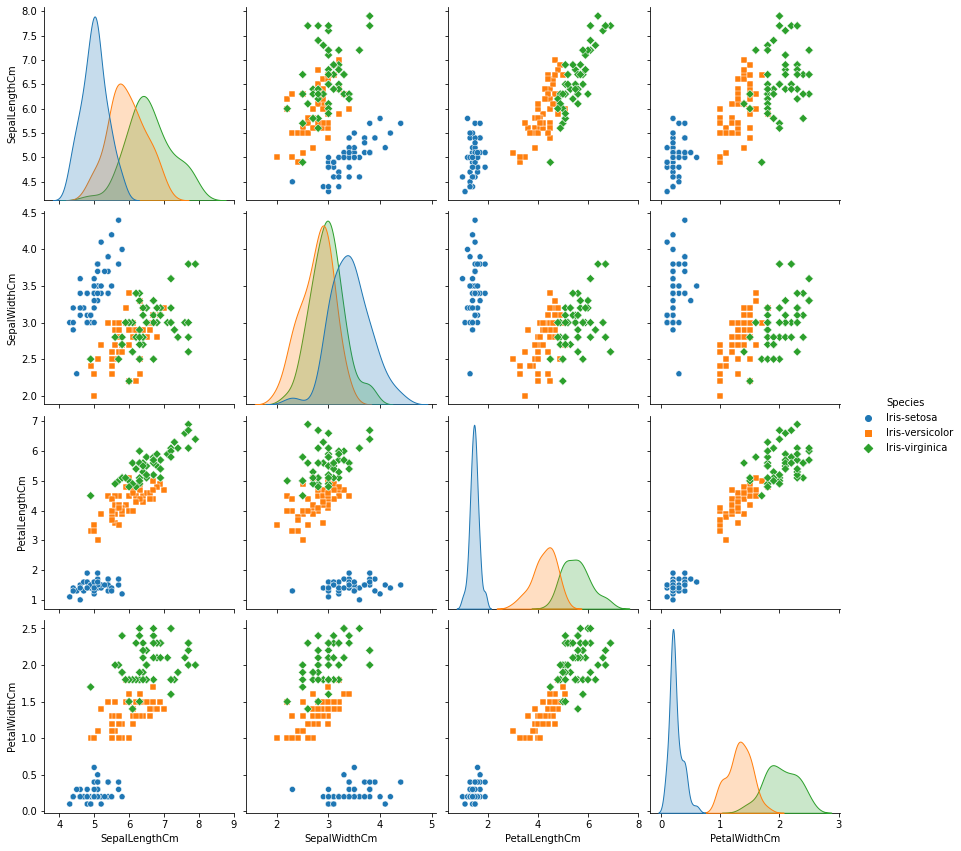

<Figure size 432x288 with 0 Axes>

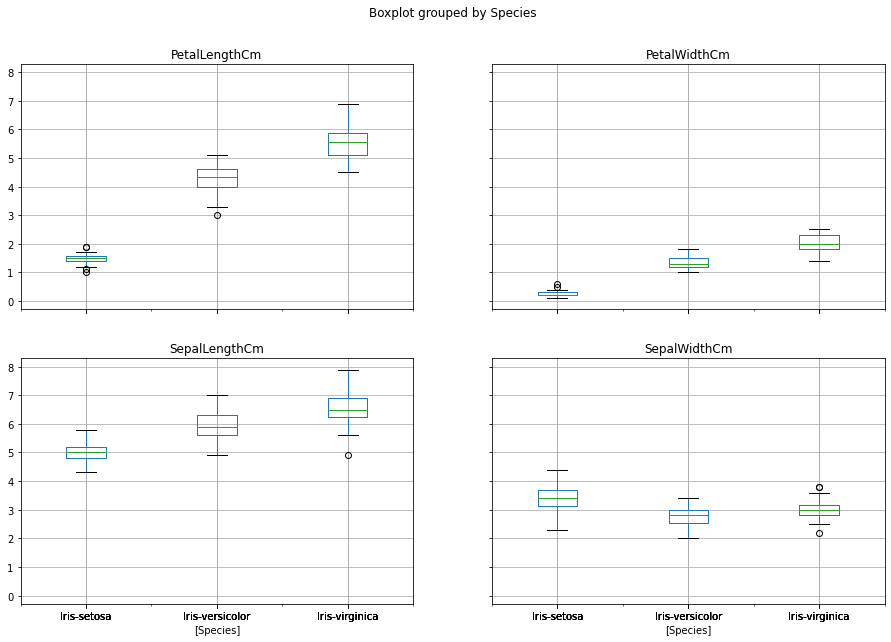

In [54]:
# Visualize Data

## PairPlot
plt.figure()
sns.pairplot(dataset.drop('Id', axis=1), hue='Species', size=3, markers=['o', 's', 'D'])
plt.show()


## BoxPlot
plt.figure()
dataset.drop('Id', axis=1).boxplot(by='Species', figsize=(15, 10))
plt.show()

In [55]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [56]:
# KNN
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train, y_train)

# Predict
y_pred = knn_clf.predict(X_test)

In [58]:
# Evaluate 
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]])

In [59]:
# Classification Report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.92      1.00      0.96        12
           2       1.00      0.86      0.92         7

    accuracy                           0.97        30
   macro avg       0.97      0.95      0.96        30
weighted avg       0.97      0.97      0.97        30



In [60]:
# Model Accuracy
accuracy = accuracy_score(y_test, y_pred) * 100
print('Accuracy of the model:' + str(round(accuracy, 2)) + ' %.')

Accuracy of the model:96.67 %.


## 5. Image Classification using Decision Tree
Decision Tree Algorithm can be imported from <code>sklearn.tree</code> like this:
```python
from sklearn.tree import DecisionTreeClassifier
```

In this we use  Pima Indians Diabetes Dataset from Kaggle.

Link:- https://www.kaggle.com/uciml/pima-indians-diabetes-database

Ofcourse, the <code>diabetes.csv</code> file is in the link above

In [61]:
# Import some things
from sklearn.tree import DecisionTreeClassifier

In [62]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv('/content/drive/MyDrive/SmartKnower/Minor Project/diabetes.csv', header=None, names=col_names)

In [63]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [64]:
# Feature Selection
feature_cols = ['pregnant', 'insulin', 'bmi', 'age', 'glucose', 'bp', 'pedigree']
X = pima[feature_cols]
y = pima.label

In [65]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [66]:
# Decision Tree Classifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train) # Fit

# Predict
y_pred = dt_clf.predict(X_test)

In [70]:
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

print('\n')

# Classification Report
print("Classification Report: ", classification_report(y_pred, y_test))

Accuracy: 0.6666666666666666


Classification Report:                precision    recall  f1-score   support

           0       0.77      0.72      0.74       155
           1       0.49      0.55      0.52        76

    accuracy                           0.67       231
   macro avg       0.63      0.64      0.63       231
weighted avg       0.68      0.67      0.67       231



In [73]:
# Optimizing Decision Tree Performance
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf = clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Metrics
print('Accuracy Score: ', accuracy_score(y_test, y_pred))
print()
print('Classification Report: ', classification_report(y_test, y_pred))

Accuracy Score:  0.7705627705627706

Classification Report:                precision    recall  f1-score   support

           0       0.80      0.85      0.82       146
           1       0.71      0.64      0.67        85

    accuracy                           0.77       231
   macro avg       0.76      0.74      0.75       231
weighted avg       0.77      0.77      0.77       231



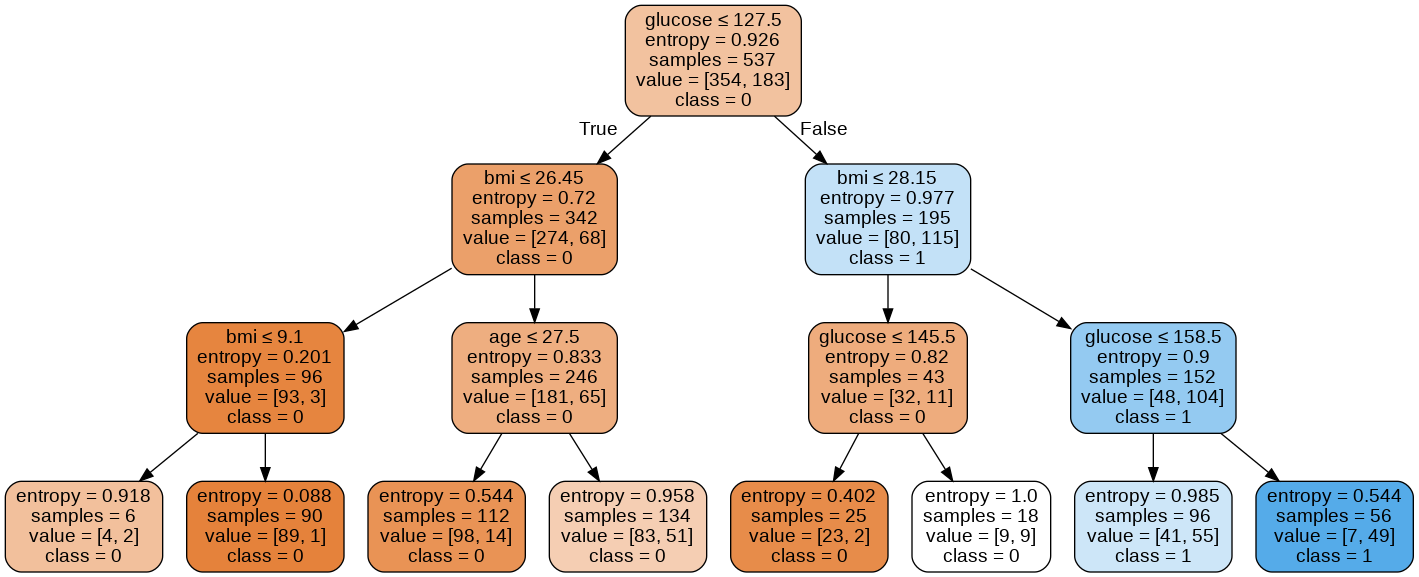

In [75]:
# Visualize Decision Tree
from io import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, special_characters=True, 
                feature_names = feature_cols,class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

## 6. Image Classification using Random Forest
Random Forest Classifier can be imported from <code>sklearn.ensemble</code> like this:
```python
from sklearn.ensemble import RandomForestClassifier
```

In here, we are using <code>load_iris</code> from <code>sklearn.datasets</code> for the dataset like this:
```python
from sklearn.datasets import load_iris
```

In [76]:
# Import some modules
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

In [77]:
iris = load_iris()

In [78]:
print(iris.target_names)

print(iris.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [79]:
print(iris.data[0:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [80]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [81]:
# Create a Dataframe
data = pd.DataFrame({
    'sepal length': iris.data[:, 0],
    'sepal width': iris.data[:,1],
    'petal length': iris.data[:,2],
    'petal width': iris.data[:,3],
    'species': iris.target
})

data.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [82]:
# Split data
X = data[['sepal length', 'sepal width', 'petal length', 'petal width']] # Features
y = data['species'] # labels


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [83]:
# Gaussian Classifier
rf_clf = RandomForestClassifier(n_estimators=100) 
rf_clf.fit(X_train, y_train) # Fit

# Predict
y_pred = rf_clf.predict(X_test)

In [85]:
# Model Accuracy
print('Accuracy: ', accuracy_score(y_test, y_pred))
print()

# Classification Report
print('Classification Report: ', classification_report(y_test, y_pred))

Accuracy:  0.9777777777777777

Classification Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.93      0.97        15
           2       0.93      1.00      0.97        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [87]:
# Predict for a single item
rf_clf.predict([[3, 5, 4, 2]]) # versicolor

array([1])

In [88]:
# Finding Important Features
model = RandomForestClassifier(n_estimators=100)

model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [89]:
feature_imp = pd.Series(model.feature_importances_, index=iris.feature_names).sort_values(ascending=False)
feature_imp

petal width (cm)     0.441312
petal length (cm)    0.413042
sepal length (cm)    0.117523
sepal width (cm)     0.028123
dtype: float64

No handles with labels found to put in legend.


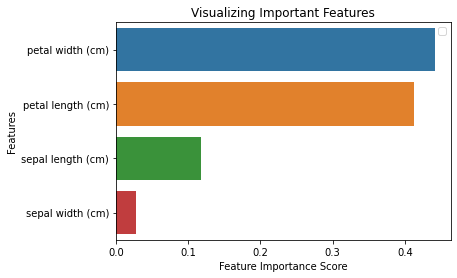

In [90]:
# Visualize this
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

## 7. Image Classification using XGBoost

<code>XGBoost</code> Algorithm can be imported using:
```python
from xgboost import XGBClassifier
```

Here, Fashion MNIST dataset is used and is imported from <code>tensorflow.keras</code> or <code>keras</code>
```python
from tensorflow.keras.datasets import fashion_mnist
```

In [91]:
# Import XGBoost
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from tensorflow.keras.datasets import fashion_mnist
import time

In [92]:
# Load Data

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
# X_train is 60000 rows of 28x28 values --> reshaped in 60000 x 784
RESHAPED = 784

X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalize the datasets
X_train /= 255.
X_test /= 255.

print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

4423680/4422102 [==============================] - 0s 0us/step
60000 train samples
10000 test samples


In [93]:
# Fit data into the XGBoost Model
xgb_clf = XGBClassifier()

cv_results = cross_val_score(xgb_clf, X_train, y_train, cv=2, scoring='accuracy', n_jobs=1, verbose=1)
xgb_clf.fit(X_train, y_train, verbose=True)

print(cv_results)
print(xgb_clf)

# Predict
expected_y = y_test
predicted_y = xgb_clf.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 14.3min finished


[0.86163333 0.86273333]
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


In [96]:
# summarize the fit of the model
print(); print(classification_report(expected_y, predicted_y))


              precision    recall  f1-score   support

           0       0.80      0.83      0.82      1000
           1       0.99      0.96      0.97      1000
           2       0.74      0.76      0.75      1000
           3       0.85      0.89      0.87      1000
           4       0.74      0.78      0.76      1000
           5       0.98      0.94      0.96      1000
           6       0.67      0.57      0.62      1000
           7       0.92      0.94      0.93      1000
           8       0.95      0.96      0.96      1000
           9       0.93      0.95      0.94      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000

